In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re 
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('Tinder_Data_v3_Clean_Edition.csv')

df.head()

,_id,sum_app_opens,no_of_days,nrOfConversations,longestConversation,longestConversationInDays,averageConversationLength,averageConversationLengthInDays,medianConversationLength,medianConversationLengthInDays,nrOfOneMessageConversations,percentOfOneMessageConversations,nrOfGhostingsAfterInitialMessage,no_of_matches,no_of_msgs_sent,no_of_msgs_received,swipe_likes,swipe_passes,birthDate,ageFilterMin,ageFilterMax,cityName,country,createDate,education,gender,interestedIn,instagram,spotify,jobTitle,user_age
0,00b74e27ad1cbb2ded8e907fcc49eaaf,6839,477,739,133,684,8.56,10.24,3,0.081134,226,30.58,66,3408,3360,3261,23341,24229,1976-01-01,21,35,Trondheim,Norway,2016-01-01,Has high school and/or college education,M,F,False,False,unknown,40
1,024610702baf540af5637873cd1534e9,26280,1197,464,36,622,4.50,3.97,2,0.000069,56,12.07,16,888,2088,1509,45068,49559,1997-07-04,18,29,Richmond,USA,2016-07-12,Has high school and/or college education,M,F,False,False,unknown,19
2,0a5e3dd8489fe67485ddb7d6adb26ebd,3196,249,303,33,295,4.25,3.47,2,0.033715,106,34.98,17,548,1291,1152,6679,5500,1998-02-06,20,24,unknown,unknown,2019-07-01,Has no high school or college education,M,F,False,False,unknown,21
3,048dd37565ad9cbc24c163ffedffbf58,2077,158,47,28,130,7.89,5.88,6,0.643727,3,6.38,0,94,371,224,6724,7899,1998-02-24,20,25,Edmonton,Canada,2019-09-25,Has no high school or college education,M,F,False,False,unknown,21
4,0eb998fdde77f9c123c07eace18a5cc1,11946,715,809,444,198,6.82,1.92,3,0.091771,296,36.59,13,1905,5527,6052,60169,96673,1996-11-10,18,27,unknown,unknown,2017-11-17,Has no high school or college education,M,F,True,False,Research Assistant,21


In [35]:
# Calculating basic descriptive statistics for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_stats = df[numerical_columns].describe().transpose()
numerical_stats['range'] = numerical_stats['max'] - numerical_stats['min']
print("Numerical Columns Descriptive Statistics:")
print(numerical_stats)


# Calculating frequency counts for categorical columns
categorical_columns = df.select_dtypes(include=[object, 'category']).columns
categorical_freq_counts = {col: df[col].value_counts() for col in categorical_columns}
print("\nFrequency Counts for Categorical Columns:")
for col, freq_counts in categorical_freq_counts.items():
    print(f"\n{col}:")
    print(freq_counts)


Numerical Columns Descriptive Statistics:
                                   count          mean           std   min  \
sum_app_opens                     1209.0   4593.923077   8501.985991   0.0   
no_of_days                        1209.0    327.335815    420.853107   0.0   
nrOfConversations                 1209.0    241.918114    674.592881   0.0   
longestConversation               1209.0    139.118280    226.287750   0.0   
longestConversationInDays         1209.0    166.403639    323.848949   0.0   
averageConversationLength         1209.0      9.809123     18.071807   0.0   
averageConversationLengthInDays   1209.0      3.664880      5.915688   0.0   
medianConversationLength          1209.0      4.275434     27.997121   0.0   
medianConversationLengthInDays    1209.0      0.524231      5.939479   0.0   
nrOfOneMessageConversations       1209.0     75.727047    230.038166   0.0   
percentOfOneMessageConversations  1209.0     30.972862     18.310761   0.0   
nrOfGhostingsAfterInit

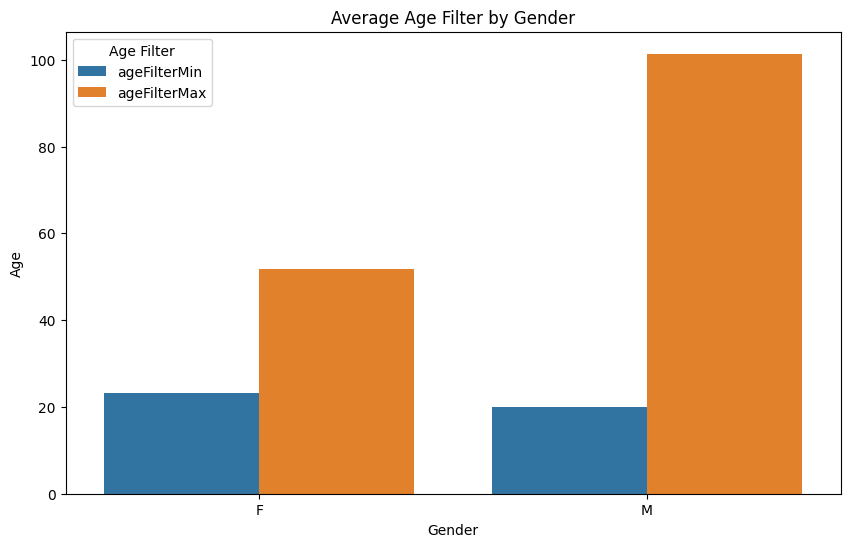

In [13]:
# a graph of the age filter data comparing male and female users' max and min age filter


# Filter the dataframe to include only relevant columns
age_filter_data = df[['gender', 'ageFilterMin', 'ageFilterMax']]

# Create a new dataframe for plotting
age_filter_summary = age_filter_data.groupby('gender').agg({
    'ageFilterMin': 'mean',
    'ageFilterMax': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='value', hue='variable', 
            data=pd.melt(age_filter_summary, ['gender'], value_vars=['ageFilterMin', 'ageFilterMax']))

plt.title('Average Age Filter by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Age Filter')
plt.show()



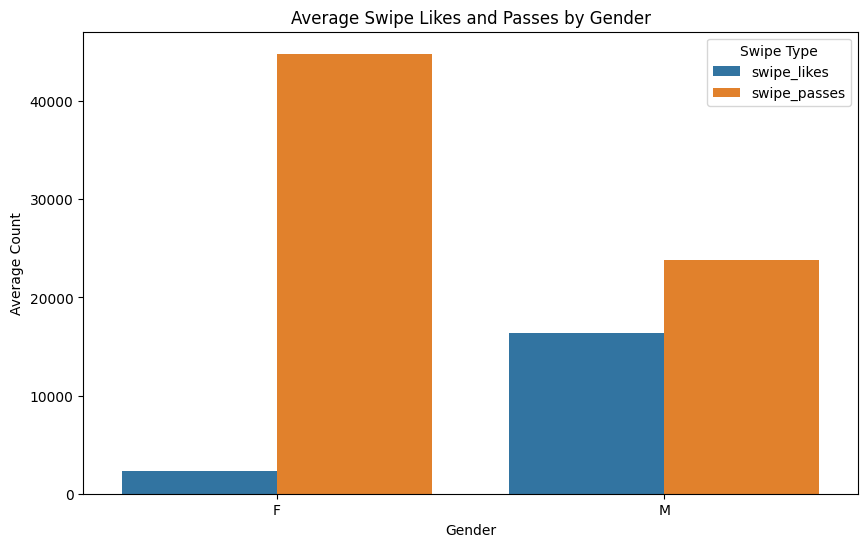

In [16]:
# a graph comparing average swipe likes and average swipe passes between male and female

# Filter the dataframe to include only relevant columns
swipe_data = df[['gender', 'swipe_likes', 'swipe_passes']]

# Create a new dataframe for plotting
swipe_summary = swipe_data.groupby('gender').agg({
    'swipe_likes': 'mean',
    'swipe_passes': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='value', hue='variable', 
            data=pd.melt(swipe_summary, ['gender'], value_vars=['swipe_likes', 'swipe_passes']))

plt.title('Average Swipe Likes and Passes by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Count')
plt.legend(title='Swipe Type')
plt.show()




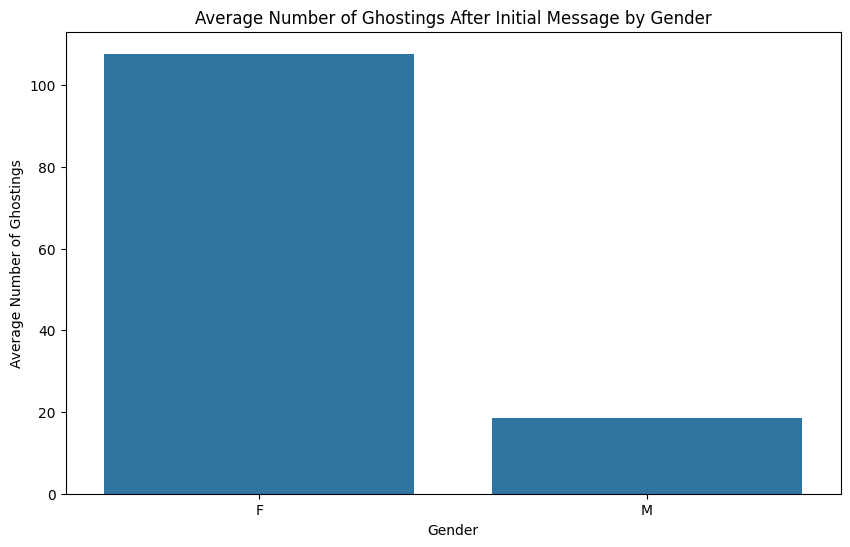

In [17]:
# a graph comparing the nrOfGhostingsAfterInitialMessage between male and female

# Filter the dataframe to include only relevant columns
ghosting_data = df[['gender', 'nrOfGhostingsAfterInitialMessage']]

# Create a new dataframe for plotting
ghosting_summary = ghosting_data.groupby('gender').agg({
    'nrOfGhostingsAfterInitialMessage': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='nrOfGhostingsAfterInitialMessage', data=ghosting_summary)

plt.title('Average Number of Ghostings After Initial Message by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Ghostings')
plt.show()


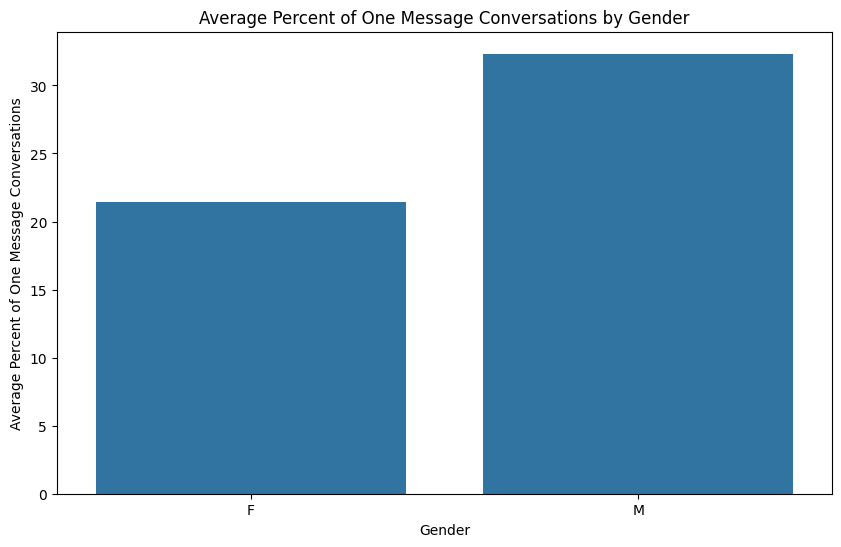

In [19]:
# a graph comparing the percentOfOneMessageConversations between male and female

# Filter the dataframe to include only relevant columns
one_message_data = df[['gender', 'percentOfOneMessageConversations']]

# Create a new dataframe for plotting
one_message_summary = one_message_data.groupby('gender').agg({
    'percentOfOneMessageConversations': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='percentOfOneMessageConversations', data=one_message_summary)

plt.title('Average Percent of One Message Conversations by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Percent of One Message Conversations')
plt.show()


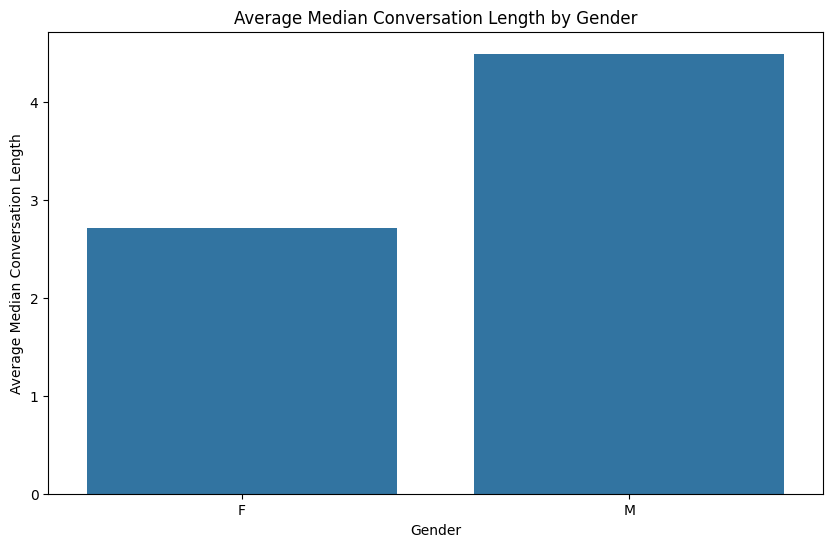

In [20]:
# a graph comparing the medianConversationLength between male and female

# Filter the dataframe to include only relevant columns
conversation_length_data = df[['gender', 'medianConversationLength']]

# Create a new dataframe for plotting
conversation_length_summary = conversation_length_data.groupby('gender').agg({
    'medianConversationLength': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='medianConversationLength', data=conversation_length_summary)

plt.title('Average Median Conversation Length by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Median Conversation Length')
plt.show()


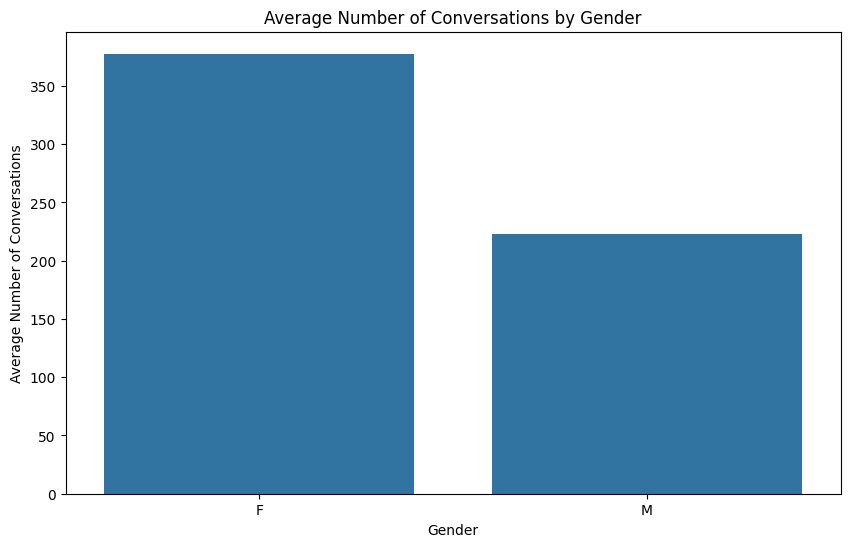

In [21]:
# a graph comparing the nrOfConversations between male and female

# Filter the dataframe to include only relevant columns
conversations_data = df[['gender', 'nrOfConversations']]

# Create a new dataframe for plotting
conversations_summary = conversations_data.groupby('gender').agg({
    'nrOfConversations': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='nrOfConversations', data=conversations_summary)

plt.title('Average Number of Conversations by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Conversations')
plt.show()


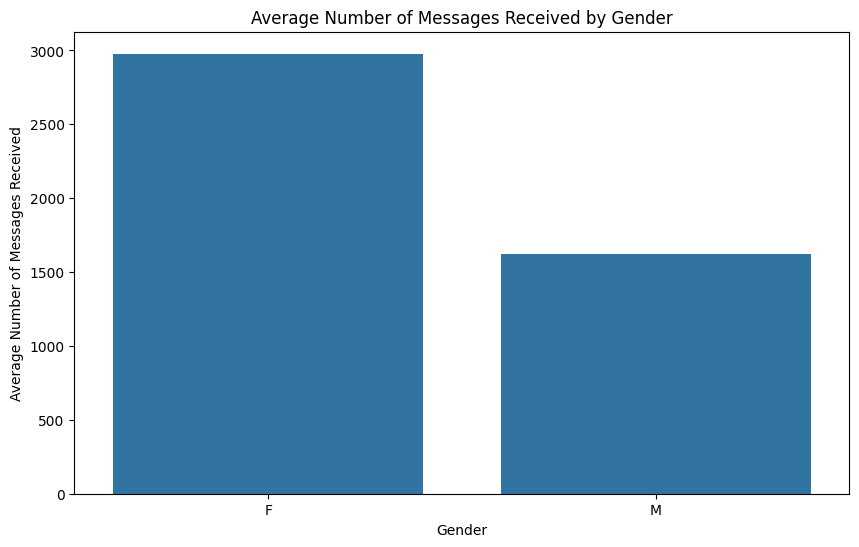

In [25]:
# a graph comparing the no_of_msgs_received between male and female

# Filter the dataframe to include only relevant columns
msgs_received_data = df[['gender', 'no_of_msgs_received']]

# Create a new dataframe for plotting
msgs_received_summary = msgs_received_data.groupby('gender').agg({
    'no_of_msgs_received': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='no_of_msgs_received', data=msgs_received_summary)

plt.title('Average Number of Messages Received by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Messages Received')
plt.show()


/var/folders/5t/5kcb7x394tdf6wpn5rhw7h900000gn/T/ipykernel_80675/2353077796.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='no_of_matches', y='jobTitle', data=top_10_matches, palette='viridis')


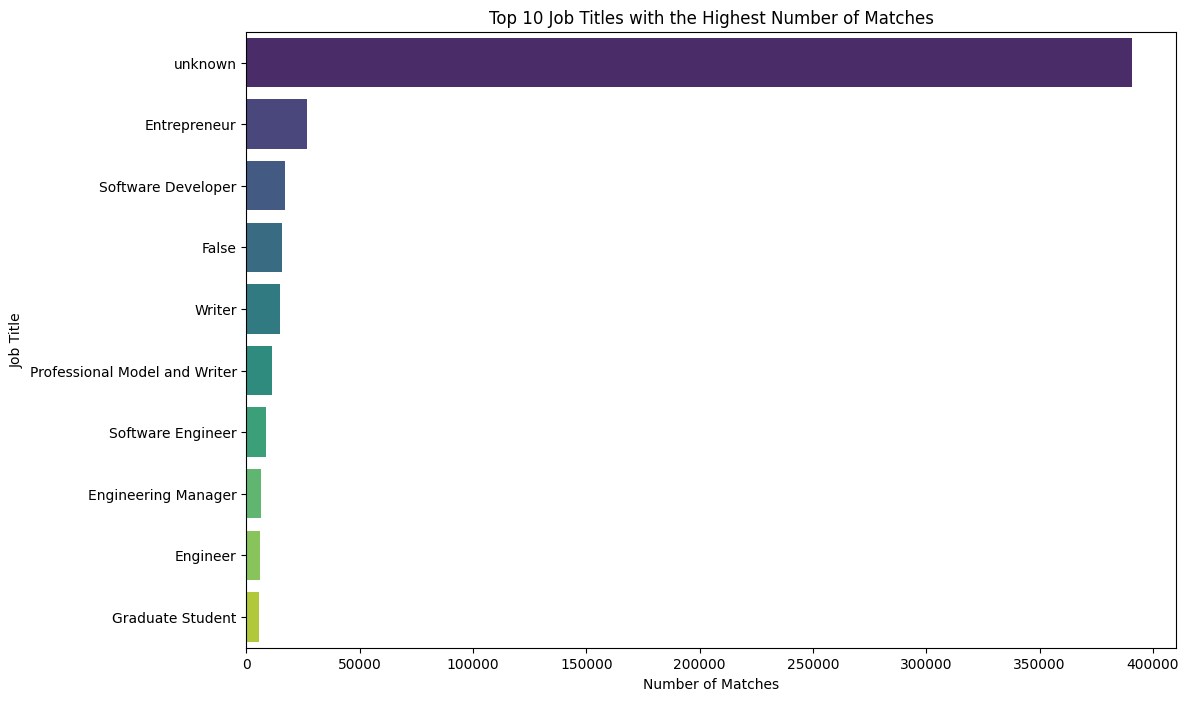

In [26]:
# a graph ranking the top 10 jobTitle with the highest no_of_matches

# Filter the dataframe to include only relevant columns
matches_data = df[['jobTitle', 'no_of_matches']]

# Create a new dataframe for plotting
matches_summary = matches_data.groupby('jobTitle').agg({
    'no_of_matches': 'sum'
}).reset_index()

# Sort the dataframe to get the top 10 job titles with the highest number of matches
top_10_matches = matches_summary.sort_values(by='no_of_matches', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='no_of_matches', y='jobTitle', data=top_10_matches, palette='viridis')

plt.title('Top 10 Job Titles with the Highest Number of Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Job Title')
plt.show()


In [28]:
df_conv = pd.read_csv('Tinder_Conv_Data_v4.csv')

df_conv.head()

,_id,match_id,message,gender,Opener,Basic Opener,Conv Length,Gif Opener,question,Pickup Line
0,024610702baf540af5637873cd1534e9,Match 464,"Hello again, so now that we matched again, wha...",M,81,False,1,False,True,False
1,024610702baf540af5637873cd1534e9,Match 463,"Most of the girls on this app scare me, but fo...",M,119,False,2,False,False,True
2,024610702baf540af5637873cd1534e9,Match 462,"Most of the girls on this app scare me, but fo...",M,121,False,4,False,False,True
3,024610702baf540af5637873cd1534e9,Match 460,https&colon;&sol;&sol;media2.giphy.com&sol;med...,M,168,False,2,True,False,True
4,024610702baf540af5637873cd1534e9,Match 459,https&colon;&sol;&sol;media3.giphy.com&sol;med...,M,168,False,5,True,False,True


/var/folders/5t/5kcb7x394tdf6wpn5rhw7h900000gn/T/ipykernel_80675/3632042516.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='Basic Opener', data=comparison_summary, palette='viridis')


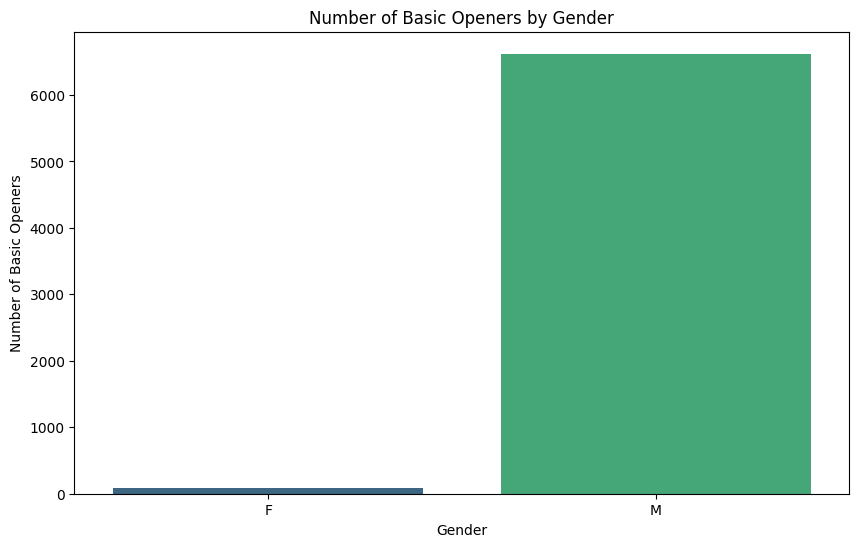

/var/folders/5t/5kcb7x394tdf6wpn5rhw7h900000gn/T/ipykernel_80675/3632042516.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='Gif Opener', data=comparison_summary, palette='viridis')


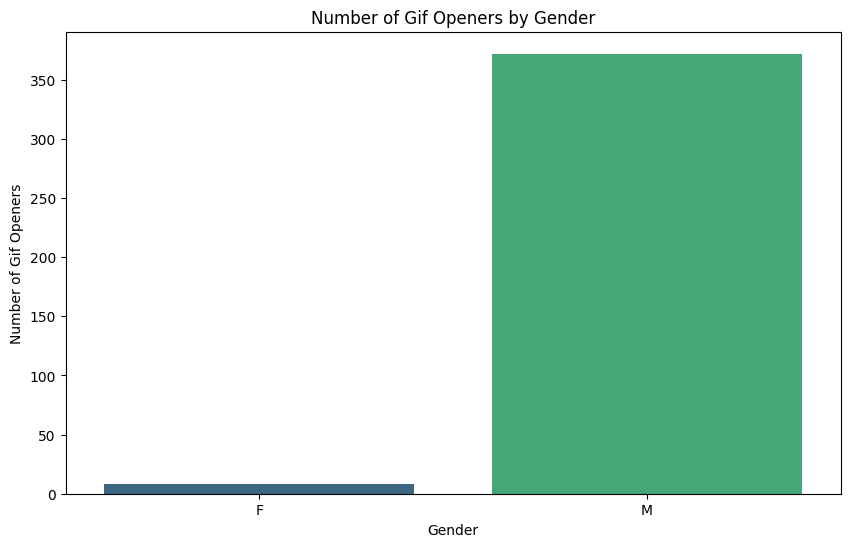

/var/folders/5t/5kcb7x394tdf6wpn5rhw7h900000gn/T/ipykernel_80675/3632042516.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='question', data=comparison_summary, palette='viridis')


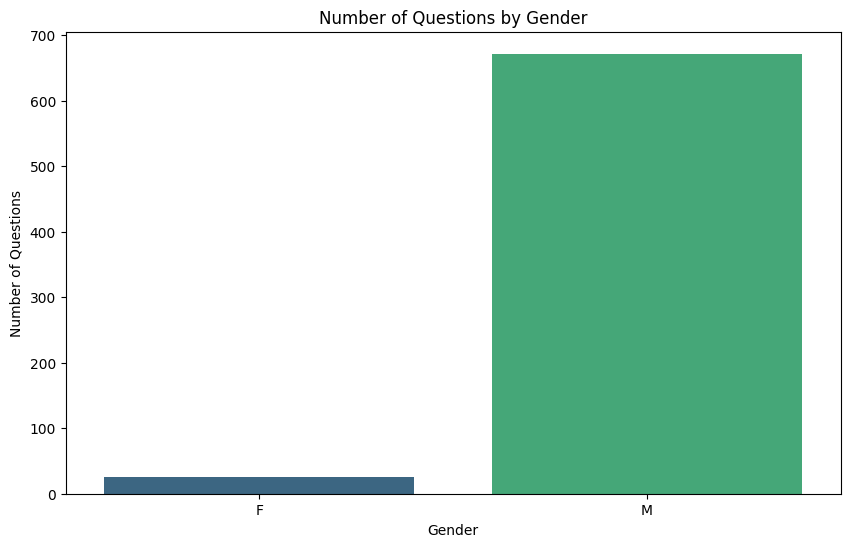

/var/folders/5t/5kcb7x394tdf6wpn5rhw7h900000gn/T/ipykernel_80675/3632042516.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='Pickup Line', data=comparison_summary, palette='viridis')


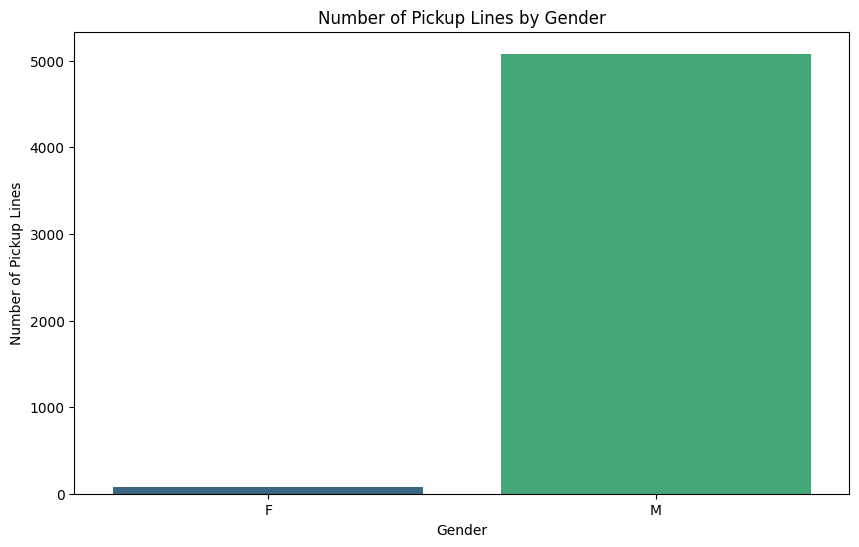

In [31]:
# a portfolio of graphs comparing the number of basic opener, gif opener, question, and pickup line between male and female

# Filter the dataframe to include only relevant columns
comparison_data = df_conv[['gender', 'Basic Opener', 'Gif Opener', 'question', 'Pickup Line']]

# Create a new dataframe for plotting
comparison_summary = comparison_data.groupby('gender').agg({
    'Basic Opener': 'sum',
    'Gif Opener': 'sum',
    'question': 'sum',
    'Pickup Line': 'sum'
}).reset_index()

# Plotting Basic Opener
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='Basic Opener', data=comparison_summary, palette='viridis')
plt.title('Number of Basic Openers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Basic Openers')
plt.show()

# Plotting Gif Opener
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='Gif Opener', data=comparison_summary, palette='viridis')
plt.title('Number of Gif Openers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Gif Openers')
plt.show()

# Plotting Question
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='question', data=comparison_summary, palette='viridis')
plt.title('Number of Questions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Questions')
plt.show()

# Plotting Pickup Line
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='Pickup Line', data=comparison_summary, palette='viridis')
plt.title('Number of Pickup Lines by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Pickup Lines')
plt.show()


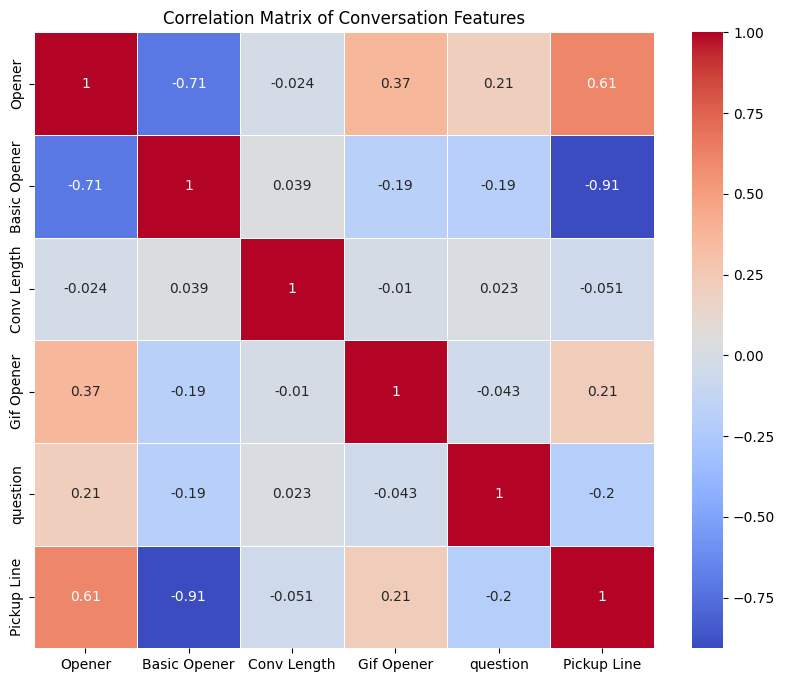

In [32]:
# Correlation Analysis

# Select relevant columns for correlation analysis
correlation_data = df_conv[['Opener', 'Basic Opener', 'Conv Length', 'Gif Opener', 'question', 'Pickup Line']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Conversation Features')
plt.show()
